## Leitor de números

Objetivos: Ler a imagem para identificar qual o número está na mesma
Como: O mesmo fará análise através de machine learning para identificar os pixels da imagem e tentar informar qual o número da imagem

### Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

### Importando dados

In [2]:
mnist = fetch_openml('mnist_784', version = 1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x, y = mnist['data'].values, mnist['target'].values

In [5]:
# y está em formato string. Convertendo o mesmo para float

y = y.astype(np.float)

C:\Users\leo-s\AppData\Local\Temp\ipykernel_9456\1888112348.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


5.0


<function matplotlib.pyplot.show(close=None, block=None)>

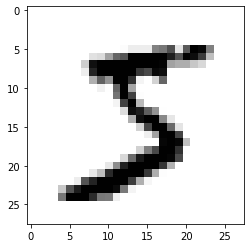

In [6]:
# Visualizando os dados
# criada a variável N para substituir por pontos especificos da tabela que desejam ser vistos
# 

n = 0

plt.imshow(x[n].reshape(28, 28), cmap = 'binary')
print(y[n])
plt.show

### Classificador Binário

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3)

In [9]:
y_train_5 = (y_train == 5)

In [10]:
y_train_5

array([False, False, False, ..., False, False, False])

In [11]:
pd.Series(y_train_5).value_counts()

False    44550
True      4450
dtype: int64

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

Classe real:  True
Classe predita pelo modelo:  [False]


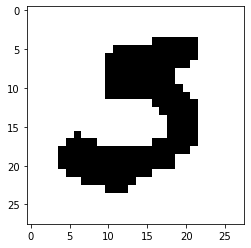

In [14]:
n = 48505

plt.imshow(x_train[n].reshape(28, 28), cmap = 'binary')
print('Classe real: ', y_train_5[n])
print('Classe predita pelo modelo: ', sgd_clf.predict([x_train[n]]))

In [15]:
## Validando a qualidade da previsão de dados

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train, y_train, cv = 3, scoring = 'accuracy')

array([0.8891882 , 0.89120186, 0.89377334])

#### Validações Através de Matriz de Confusão

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[43413,  1137],
       [  569,  3881]], dtype=int64)

In [19]:
from sklearn.metrics import precision_score, recall_score

In [20]:
y_train_pred = sgd_clf.predict(x_train)

print('Precisão: ', precision_score(y_train_5, y_train_pred))
print('Recall: ', recall_score(y_train_5, y_train_pred))

Precisão:  0.773415703467517
Recall:  0.8721348314606742


In [21]:
from sklearn.metrics import classification_report

In [24]:
print(confusion_matrix(y_train_5, sgd_clf.predict(x_train)))
print(classification_report(y_train_5, y_train_pred))

[[43413  1137]
 [  569  3881]]
              precision    recall  f1-score   support

       False       0.99      0.97      0.98     44550
        True       0.77      0.87      0.82      4450

    accuracy                           0.97     49000
   macro avg       0.88      0.92      0.90     49000
weighted avg       0.97      0.97      0.97     49000



#### Classificação Multiclasse

In [25]:
sgd_clf.fit(x_train, y_train)

SGDClassifier()

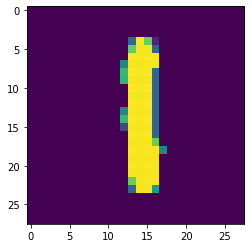

In [30]:
n = 10

digit = x_train[n]
plt.imshow(digit.reshape(28,28))

In [31]:
sgd_clf.predict([digit])

array([1.])

In [33]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv = 3)

In [34]:
conf_mx = confusion_matrix(y_train, y_train_pred)

print(conf_mx)
print(classification_report(y_train, y_train_pred))

[[4623    0   47   23    0   42   41    4   29   13]
 [   3 5254   70   44    3   31   19   30   97   13]
 [  76   43 4142  155   28   33   94   70  160   20]
 [  56   12  149 4432    6  160   25   50   83   47]
 [  25   16   64   44 3886   41   77   44   99  440]
 [  83   15   40  260   30 3640  127   19  155   81]
 [  49    6   39   10   15   80 4594    3   38    3]
 [  29   10   74   40   33   13    3 4633   39  206]
 [  47   59  275  417   19  495   55   24 3236  144]
 [  38   11   36  129   98   57    2  282  144 4102]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      4822
         1.0       0.97      0.94      0.96      5564
         2.0       0.84      0.86      0.85      4821
         3.0       0.80      0.88      0.84      5020
         4.0       0.94      0.82      0.88      4736
         5.0       0.79      0.82      0.81      4450
         6.0       0.91      0.95      0.93      4837
         7.0       0.90      0.91   

<AxesSubplot:>

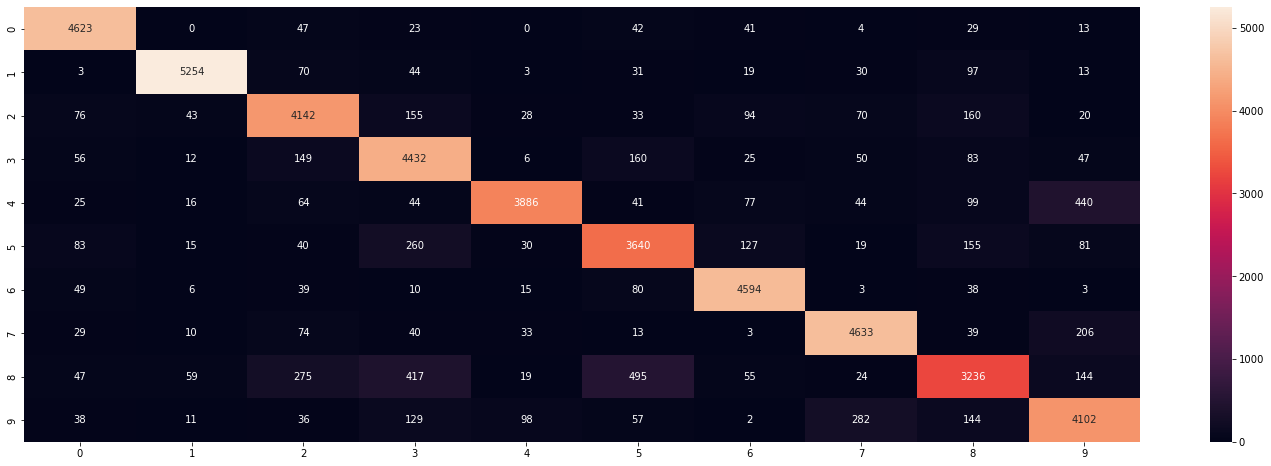

In [36]:
fig, ax = plt.subplots(figsize = (25,8))

sns.heatmap(conf_mx, annot = True, fmt = '.0f')

<AxesSubplot:>

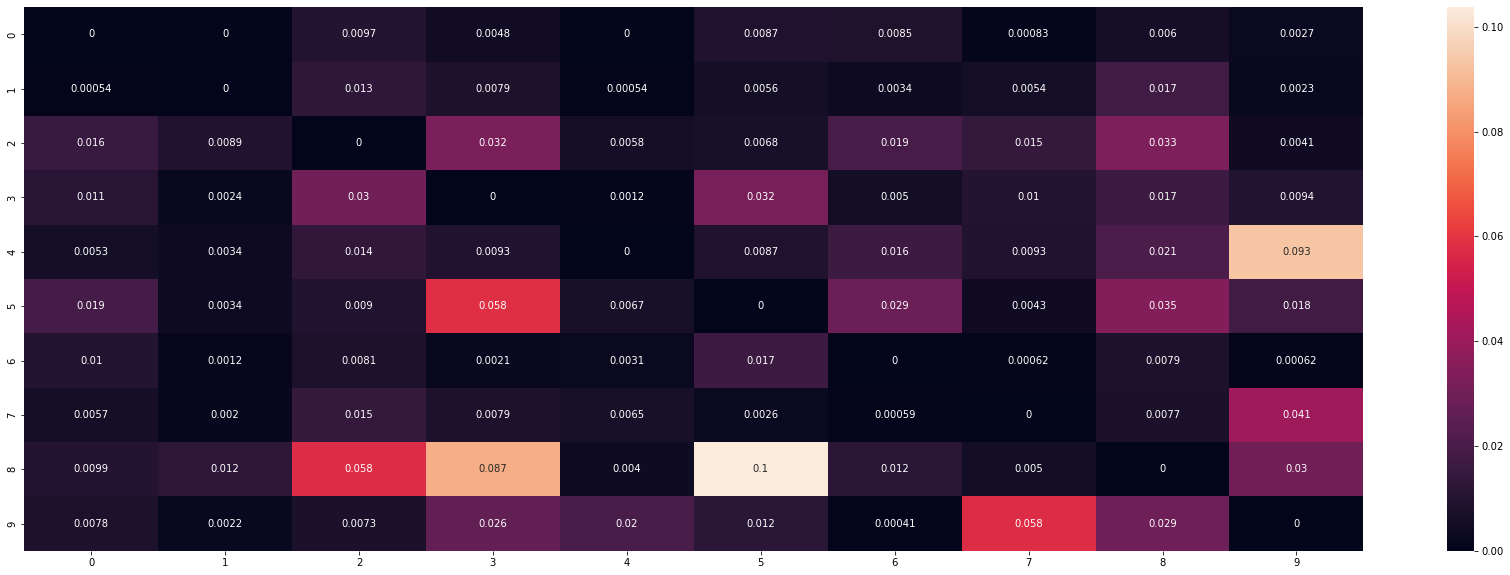

In [40]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

fig, ax = plt.subplots(figsize = (30,10))
sns.heatmap(norm_conf_mx, ax = ax, annot = True)

### Classificação Multilabel

In [42]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >=7)
y_train_odd = (y_train % 2 == 1)
y_multlabel = np.c_[y_train_large, y_train_odd]

In [43]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multlabel)

KNeighborsClassifier()

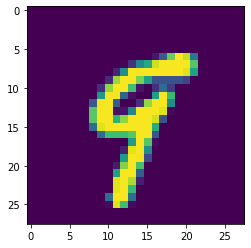

In [48]:
n = 20

digit = x_train[n]
plt.imshow(digit.reshape(28,28))

In [49]:
knn_clf.predict([digit])

array([[ True,  True]])